### Heart- Disease Reading
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Experimentation

### 1. Problem definition
> Given some clinical parameters we will use it to predict  the binary parameters.
### 2. Data
Only 14 attributes used:
      1. #3  (age)       
      2. #4  (sex)       
      3. #9  (cp)        
      4. #10 (trestbps)  
      5. #12 (chol)      
      6. #16 (fbs)       
      7. #19 (restecg)   
      8. #32 (thalach)   
      9. #38 (exang)     
      10. #40 (oldpeak)   
      11. #41 (slope)     
      12. #44 (ca)        
      13. #51 (thal)      
      14. #58 (num)       (the predicted attribute)


In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
%matplotlib inline



In [8]:
df = pd.read_csv("heart-disease.csv")
df.shape #From what we can see that the data consists of 303 rows and 14 columns aka 14 features

(303, 14)

In [9]:
df.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


### Data exploration
1. Consider the outliers within your data
2. What questions am I trying to solve
3. What sort of data is there aka the data's dictionary i.e the metadata conoting the datatype of each feature in the dataset
4.  How can I add or remove features to improve the model


In [10]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
target_count = df["target"].value_counts()# To retrieve the amount of classes being grouped in our target feature
target_count

1    165
0    138
Name: target, dtype: int64

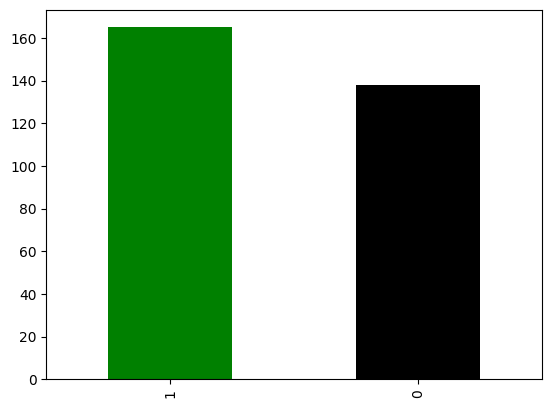

In [12]:
target_count.plot(kind ="bar", color = ["green","black"]);

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
#Comparing different columns together
#Comparing different sex with the target
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [17]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


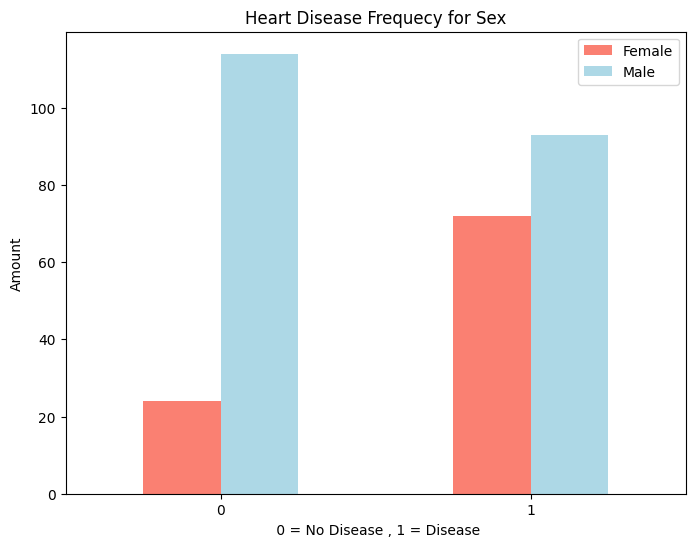

In [18]:
#From the above 0 = women
# 1 = male hence we can dictate that from the existing data 72 of people have heart disease
#Create a plot of cross tab
pd.crosstab(df.target,df.sex).plot( kind = "bar",
                                    figsize = (8,6),
                                   color = ["salmon","lightblue"]
                                  )
plt.title("Heart Disease Frequecy for Sex")
plt.xlabel(" 0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation = 0);

In [19]:
df[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
#Comparing age, thalach which is the highest heart rate achieved
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

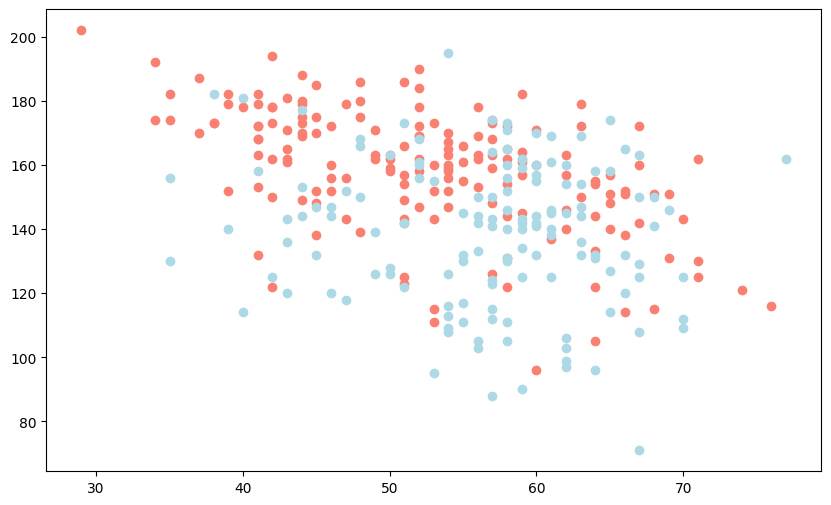

In [21]:
plt.figure(figsize = (10,6))
#Scatter with positive examples
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c = "salmon");
plt.scatter(df.age[df.target == 0 ],
           df.thalach[df.target == 0],
           c = "lightblue");

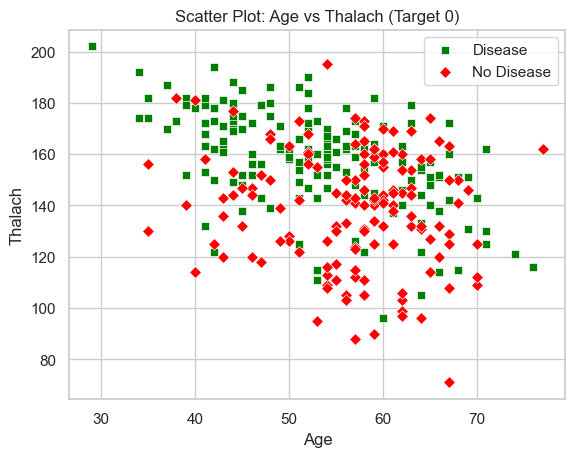

In [22]:

sns.set_theme(style='whitegrid')
sns.scatterplot(x = df.age[df["target"] == 1],
                y = df.thalach[df["target"]==1],
                marker= "s",
                color = "green"
            );
sns.scatterplot(x=df.age[df["target"] == 0],
                y=df.thalach[df["target"] == 0],
                color='red',
                marker= 'D'# Change the color here
);
plt.title("Scatter Plot: Age vs Thalach (Target 0)")
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.legend(["Disease","No Disease"]);
plt.show()

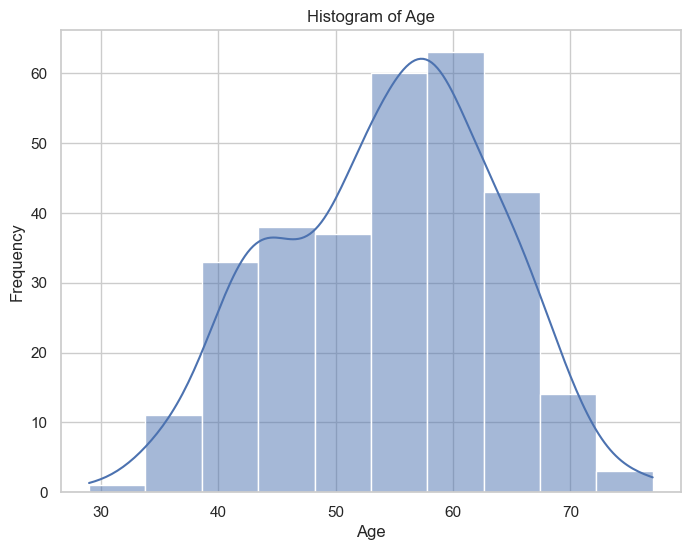

In [23]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.histplot(data=df, x='age', bins=10, kde=True)  # Adjust bins and KDE as needed
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show();

## KDE  Kernel Density Estimate 


* Kernel Density Estimate (KDE) is a non-parametric way to estimate the probability density function of a continuous random variable. In simpler terms, KDE is a method used to visualize the underlying probability distribution of a dataset. It provides a smoothed representation of the data's distribution, which can be particularly useful for exploring the shape of the data when creating plots like histograms.


* When you create a histogram with a KDE plot (by setting kde=True), Seaborn adds a smoothed curve to the top of the histogram bars. This curve represents an estimate of the probability density function of the data. The KDE curve provides insights into the potential underlying distribution of the data, showing peaks, valleys, and patterns that might not be as apparent in a raw histogram.


* In summary, the KDE plot is a helpful visualization tool that can provide a more nuanced understanding of your data's distribution, especially when dealing with continuous variables. However, if you're only interested in the basic frequency distribution of your data, you can create a histogram without the KDE plot (by setting kde=False), as shown in the previous examples.

In [24]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


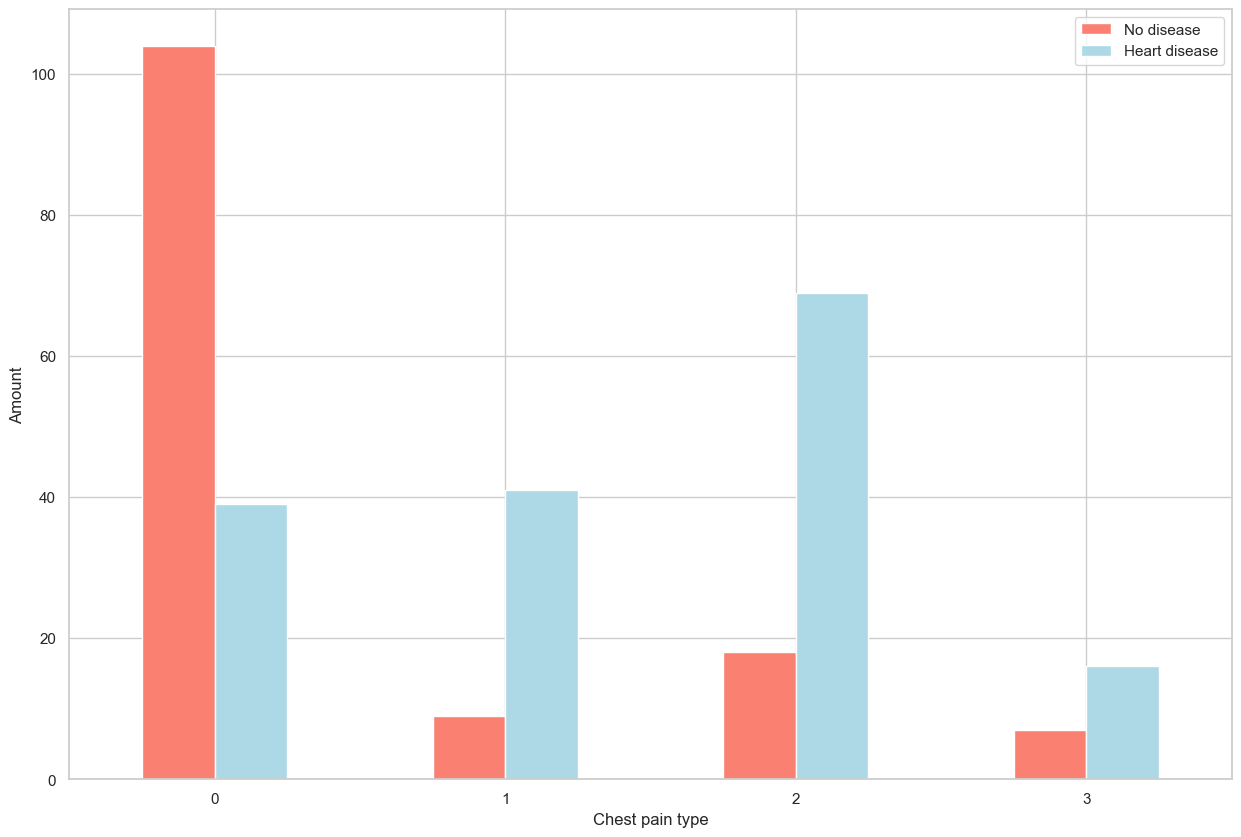

In [25]:

pd.crosstab(df.cp,df.target).plot( kind = "bar",
                                    figsize = (15,10),
                                   color = ["salmon","lightblue"],
                              
                                  )
plt.legend(["No disease","Heart disease"])
plt.xticks(rotation = 0)
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.show();

In [26]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


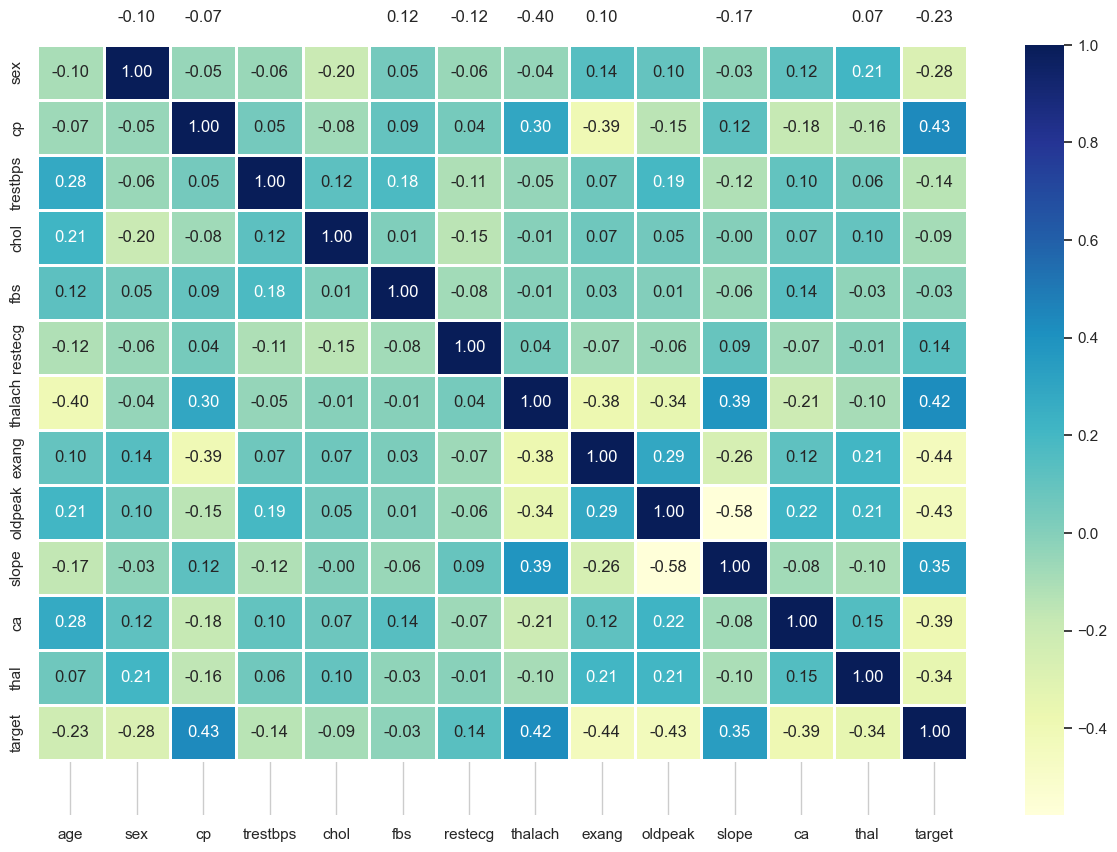

In [88]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths = 1.0,
                fmt = "0.2f",
                cmap = "YlGnBu");
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+1.0,top = 1.0);

In [28]:
##  higher positive value = higher positive correlation

Using
    1. Logistics Regression
    2.K-Maps Near Neighbors Classifiers
    3. Random Forest Classifier
    

In [29]:
models = {"Logistic Regression": LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest Classifier": RandomForestClassifier()
         }
#Define a  function
def fit_and_score(model,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    # We are then going to loop through the models dictionary and retrieve the scores as we do so
    for names, model in models.items():
        model.fit(x_train,y_train)
       
        model_scores[names] =  model.score(x_test,y_test)
        
    return model_scores

In [30]:
x = df.drop("target", axis = 1)
y = df["target"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3)

In [31]:
model_scores =  fit_and_score(model = models,
                              x_train = x_train,
                              x_test = x_test,
                             y_train = y_train,
                              y_test = y_test)
model_scores

C:\Users\JOHNSON\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8461538461538461,
 'KNN': 0.6813186813186813,
 'Random Forest Classifier': 0.7802197802197802}

### Model Comparison

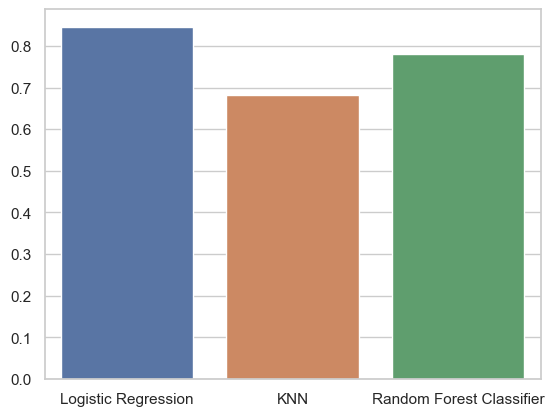

In [32]:
model_compare = pd.DataFrame(data = model_scores, index =["accuracy"] )
sns.barplot(data = model_compare);

In [33]:
type(model_scores),type(model_compare)

(dict, pandas.core.frame.DataFrame)

In [34]:
np.random.seed(42)
train_scores = []
test_scores = []
knn = KNeighborsClassifier()
neighbors = range(1,21)
for i in neighbors:
    knn.set_params(n_neighbors = i)
    #Fit the algorithm
    knn.fit(x_train,y_train)
    #Update the train scores list
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))
    




In [35]:
train_scores

[1.0,
 0.8066037735849056,
 0.7830188679245284,
 0.7311320754716981,
 0.7735849056603774,
 0.7735849056603774,
 0.7358490566037735,
 0.7169811320754716,
 0.7122641509433962,
 0.7122641509433962,
 0.7028301886792453,
 0.6981132075471698,
 0.7122641509433962,
 0.7028301886792453,
 0.7028301886792453,
 0.6981132075471698,
 0.6839622641509434,
 0.7075471698113207,
 0.6886792452830188,
 0.6933962264150944]

In [36]:
test_scores

[0.6373626373626373,
 0.5714285714285714,
 0.6373626373626373,
 0.6263736263736264,
 0.6813186813186813,
 0.6813186813186813,
 0.7472527472527473,
 0.7032967032967034,
 0.6593406593406593,
 0.6373626373626373,
 0.6593406593406593,
 0.6483516483516484,
 0.6483516483516484,
 0.6703296703296703,
 0.6593406593406593,
 0.6703296703296703,
 0.6593406593406593,
 0.6373626373626373,
 0.6373626373626373,
 0.6483516483516484]

Max KNN Score on test data:0.7472527472527473


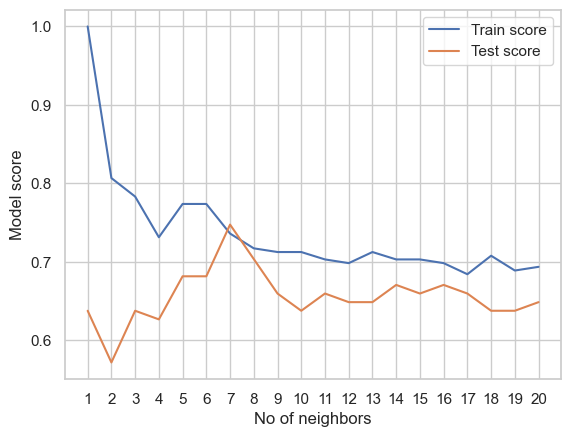

In [37]:
plt.plot(neighbors,train_scores, label ="Train score")
plt.plot(neighbors,test_scores, label ="Test score")
plt.xlabel("No of neighbors")
plt.xticks(np.arange(1,21,1))
plt.ylabel("Model score")
plt.legend();

print(f"Max KNN Score on test data:{max(test_scores)}")

In [38]:
 # We are going to tune logistic regression and random forest classifier using randomized search cv
log_reg_grid = {"C": np.logspace(-4,4,40 ), 
             "solver":["liblinear"]
            }
rf_grid ={"n_estimators" :np.arange(10,20,2),
          "min_samples_split":np.arange(2,4,2),
          "max_samples": [None],
          "min_samples_leaf":np.arange(1,5,2)}
          
          
         

In [39]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [40]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv = 5,
                               n_iter= 20,
                               verbose = True)
rs_log_reg.fit(x_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [41]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.30702906297578497}

In [42]:
rs_log_reg.score(x_test,y_test)

0.8241758241758241

#### Now lets tune our randomforest classifier


In [43]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv = 5,
                          n_iter= 20,
                          verbose = True )

In [44]:
rs_rf.fit(x_train,y_train)

C:\Users\JOHNSON\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 10 is smaller than n_iter=20. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_samples': [None],
                                        'min_samples_leaf': array([1, 3]),
                                        'min_samples_split': array([2]),
                                        'n_estimators': array([10, 12, 14, 16, 18])},
                   verbose=True)

In [45]:
rs_rf.best_params_

{'n_estimators': 18,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_samples': None}

In [46]:
rs_rf.score(x_test,y_test)

0.8131868131868132

In [47]:
np.random.seed(42)
gs_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid=log_reg_grid,
                               cv = 5,
                               verbose = True)
gs_log_reg.fit(x_train,y_train);

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [48]:
gs_log_reg.score(x_test,y_test)

0.8241758241758241

In [49]:
np.random.seed(42)
gs_rf = GridSearchCV(RandomForestClassifier(),
                               param_grid=rf_grid,
                               cv = 5,
                               verbose = True)
gs_rf.fit(x_train,y_train);
gs_rf.score(x_test,y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.8021978021978022

* ROC and AUC CURVE
* Confusion Matrix
* Classification Report
* Precision Score
* Recall
* F1 score

In [51]:
pd.crosstab(ypreds,y_test)

target,0,1
row_0,,
0,34,8
1,8,41


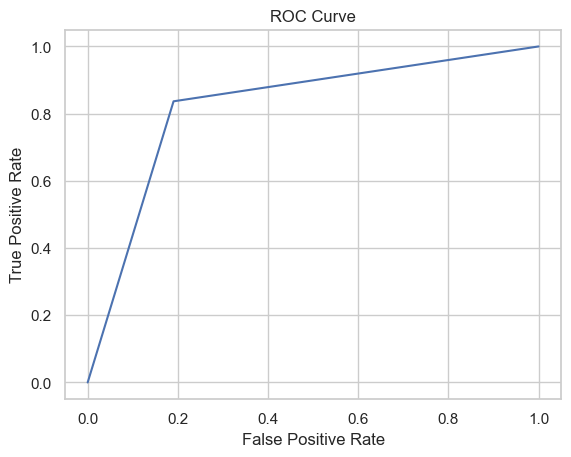

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, ypreds)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


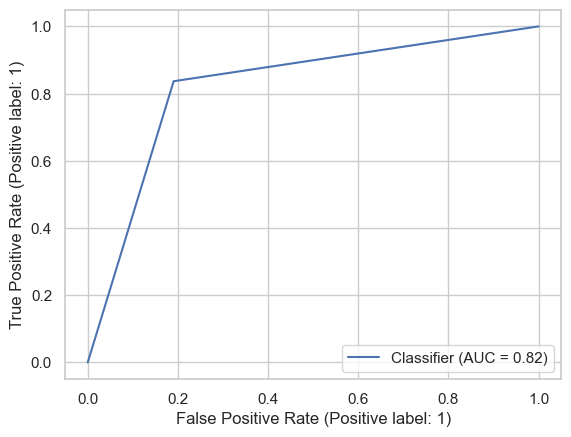

In [53]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test,ypreds )

In [54]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,ypreds)

0.8231292517006803

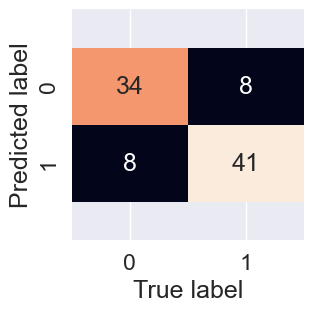

In [55]:
sns.set(font_scale =1.5)
def plot_confusion_matrix(y_test,y_preds):
    fig,ax= plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    bottom,top = ax.get_ylim()
    ax.set_ylim(bottom +0.5, top - 0.5)
    
plot_confusion_matrix(y_test,ypreds)

In [56]:
print(classification_report(y_test,ypreds))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        42
           1       0.84      0.84      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



###### Calculate evaluation metric using cross-validation


In [57]:
gs_log_reg.best_params_

{'C': 0.30702906297578497, 'solver': 'liblinear'}

In [58]:
clf = LogisticRegression(C= 88.86238162743408, 
                         solver= 'liblinear')


In [59]:
cv_acc= cross_val_score(clf,x,y,cv = 5,scoring = "accuracy")
cv_acc.mean()

0.831584699453552

In [60]:
cv_precision= cross_val_score(clf,x,y,cv = 5,scoring = "precision")
cv_precision.mean()

0.8239892427392427

## Feature importance

In [61]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
clf = LogisticRegression(C= 88.86238162743408, 
                         solver= 'liblinear')
clf.fit(x_train,y_train);


In [69]:
type(clf.coef_)#Note that.coef_ is used to generate coefficients associated with each feature in linear regression and for logistics regresssio it gives you the impact of each feature

numpy.ndarray

In [67]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))

In [68]:
feature_dict

{'age': -0.0220682017879225,
 'sex': -2.2702873243671413,
 'cp': 1.0062243196025809,
 'trestbps': -0.012324254843084923,
 'chol': -0.0035010466790726894,
 'fbs': 0.3463306320643926,
 'restecg': 0.3233969718094719,
 'thalach': 0.026888880868375986,
 'exang': -0.951181885616801,
 'oldpeak': -0.3446685641130332,
 'slope': 0.5206398764146136,
 'ca': -0.7113332243476035,
 'thal': -1.117814944567972}

In [74]:
clf.coef_

array([[-0.0220682 , -2.27028732,  1.00622432, -0.01232425, -0.00350105,
         0.34633063,  0.32339697,  0.02688888, -0.95118189, -0.34466856,
         0.52063988, -0.71133322, -1.11781494]])

In [77]:
feature_df = pd.DataFrame(feature_dict,index = [0])

In [79]:
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.022068,-2.270287,1.006224,-0.012324,-0.003501,0.346331,0.323397,0.026889,-0.951182,-0.344669,0.52064,-0.711333,-1.117815


<Axes: title={'center': 'Feature Importance'}>

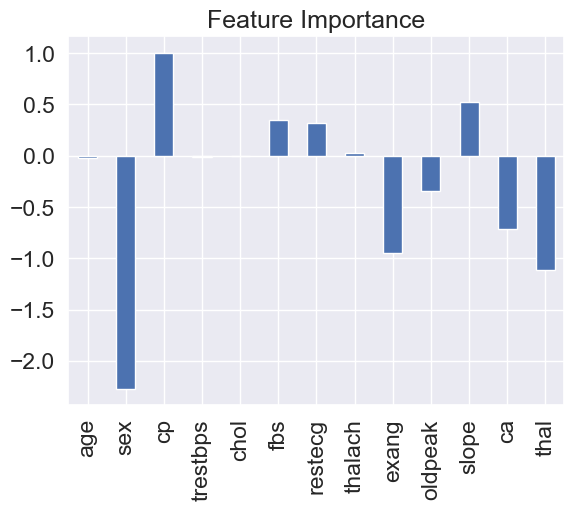

In [82]:
feature_df.T.plot.bar(title = "Feature Importance",legend = False)